# CS216 Project Prototype: Group 26
#### Jack Lichtenstein, Shannon Houser, Libba Lawrence, and Linda Tang

## Part 1: Introduction and Research Questions

Spotify is one of the world's largest music streaming service providers with over 365 million monthly active users. 
The Spotify database includes a variety of information on the characteristics and metrics of song tracks. Each song on Spotify is associated with a popularity index ranging from 0 to 100 reflecting how popular a song is relative to other songs. In this project, we plan to apply the analysis techniques that we learned in class to the Spotify music database. The **research question** is how can we predict the popularity of a song using characteristics such as danceability, energy, loudness and artist (descrbed below in the data sources section). We plan to explore different machine learning algorithms such as linear regression, decision trees and support vector regression and compare their relative performance on prediction. The scope of the project is feasible since the dataset we will use is readily avaiable online through Kaggle, the dataset contains a variety of songs and variables for analysis and it's in a relatively clean format. The algorithm from our project could  be helpful for the artist community to predict the popularity of new release songs ahead of time and could inform future researches on understanding what factors influence popularity on Spotify. 

## Part 2: Data Sources 

The data used for this project comes from an episode of the [Sliced](https://www.notion.so/SLICED-Show-c7bd26356e3a42279e2dfbafb0480073) data science challenge held in summer 2021. The data is accessible publicly on [Kaggle](https://www.kaggle.com/c/sliced-s01e08-KJSEks/data), and was initially extracted from the Spotify Web API. The competition provides three datasets, each of which we will make use of to answer our research questions:

- train.csv - the training set
- test.csv - the test set
- artists.csv - data about artists in the dataset

The train and test datasets are formatted the same way. We read in `train.csv` and `artists.csv` below. Additionally, we provide an in-depth data description as well.

In [1]:
# import some libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns

# setup the Seaborn style 
sns.set_theme()
sns.set_context('talk')

In [2]:
# change to one directory back (only run this once)
os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))

In [3]:
# read in spotify data
spotify_train = pd.read_csv("data/train.csv")
spotify_train.head()

,id,name,popularity,duration_ms,artists,id_artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,release_month,release_day
0,269,blun7 a swishland,63,167760.0,['tha Supreme'],['19i93sA0D7yS9dYoVNBqAA'],0.692,0.792,7,-5.984,0.2450,0.1300,0.000000,0.2550,0.566,129.883,2019,11.0,15.0
1,27504,Que Me Perdone Tu Señora,42,150640.0,['Manoella Torres'],['4JRKcLbpjobmoOVoOXPd6y'],0.608,0.447,6,-12.151,0.0663,0.3350,0.000035,0.1690,0.673,90.777,2007,3.0,21.0
2,16082,愛唄~since 2007~,42,242373.0,['whiteeeen'],['6v3VFX2qIWthj4Lr5QIxts'],0.572,0.782,8,-5.275,0.0361,0.3060,0.000000,0.3740,0.450,170.050,2016,3.0,9.0
3,14585,Let me be your uncle tonight,12,202989.0,['Tvíhöfði'],['6rmrk3Jk0Ecf8fjioCCZmV'],0.855,0.470,7,-9.252,0.1620,0.0111,0.000002,0.2640,0.864,102.008,2001,1.0,1.0
4,14740,Never Going Back Again - 2004 Remaster,40,134400.0,['Fleetwood Mac'],['08GQAI4eElDnROBrJRGE0X'],0.654,0.336,6,-12.825,0.0379,0.8580,0.385000,0.0786,0.947,176.083,1977,2.0,4.0


In [4]:
# read in spotify artist data
spotify_artists = pd.read_csv("data/artists.csv")
spotify_artists.head()

,id,followers,genres,name,popularity
0,55CXG5KDJpRYwBopfYAJHa,21756,"['country blues', 'country rock', 'piedmont bl...",Jorma Kaukonen,40
1,08mjMUUjyTchMHCW7evc3R,640993,['turkish pop'],Hande Yener,62
2,3Ebn7mKYzD0L3DaUB1gNJZ,161509,"['celtic', 'irish folk']",Christy Moore,56
3,7GfaHcpmNcrcHoyGnOBsAz,9578,"['kindermusik', 'kleine hoerspiel']",Die Biene Maja,56
4,1DYXGLnfNDt8mO2aK9k83j,48876,"['opm', 'vispop']",Jay-R Siaboc,39


## Exploratory Data Analysis

In [5]:
# remove brackets from genres and split by comma
spotify_artists['genres'] = spotify_artists['genres'].str.strip('[]').str.split(', ')
# separate each genre into it's own row
spotify_artists = spotify_artists.explode('genres')

In [6]:
spotify_artists['genres'] = spotify_artists['genres'].str.strip("'")
# get rid of genres that are blank
spotify_artists = spotify_artists[spotify_artists['genres'] != '']

In [7]:
# coun the most frequent genres
genre_counts = spotify_artists['genres'].value_counts().reset_index().rename(columns={'index': 'genre', 'genres': 'count'})

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, ' '),
 Text(0.5, 1.0, 'Ten Most Common Artist Genres')]

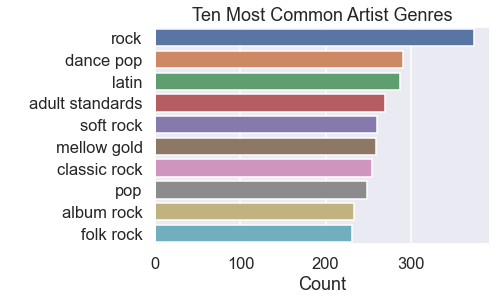

In [8]:
# plot most common genres that artists use
sns.barplot(x = 'count', y = 'genre', data = genre_counts.head(10)).set(xlabel = "Count", ylabel = " ", title = "Ten Most Common Artist Genres")

In [9]:
# sns.histplot(x = 'popularity', data = spotify_artists, bins = 30).set(xlabel = "Artist Popularity", ylabel = "Count", title = "Distribution of Artists' Popularity")

[Text(0.5, 0, 'Song Popularity'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, "Distribution of Songs' Popularity")]

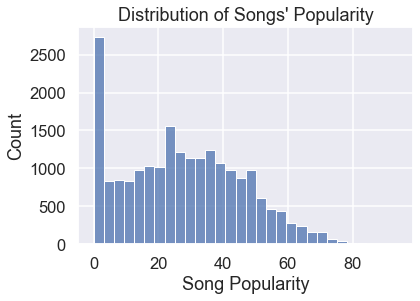

In [10]:
sns.histplot(x = 'popularity', data = spotify_train, bins = 30).set(xlabel = "Song Popularity", ylabel = "Count", title = "Distribution of Songs' Popularity")

In [11]:
spotify_train_names = spotify_train.rename({'danceability':'CharacteristicDanceability', 'energy':'CharacteristicEnergy', 'key':'CharacteristicKey', 'loudness':'CharacteristicLoudness', 'speechiness':'CharacteristicSpeechiness', 'acousticness':'CharacteristicAcousticness', 'instrumentalness': 'CharacteristicInstrumentalness', 'liveness':'CharacteristicLiveness', 'valence':'CharacteristicValence', 'tempo':'CharacteristicTempo', 'release_year':'CharacteristicRelease year'}, axis = 1)
#pd.wide_to_long(spotify_train_names, "Characteristic", i = 'id', j = "Value")
A = set(spotify_train.columns)
B = set(spotify_train_names.columns)
A.intersection(B)
spotify_train_long = pd.melt(spotify_train, id_vars = A.intersection(B))

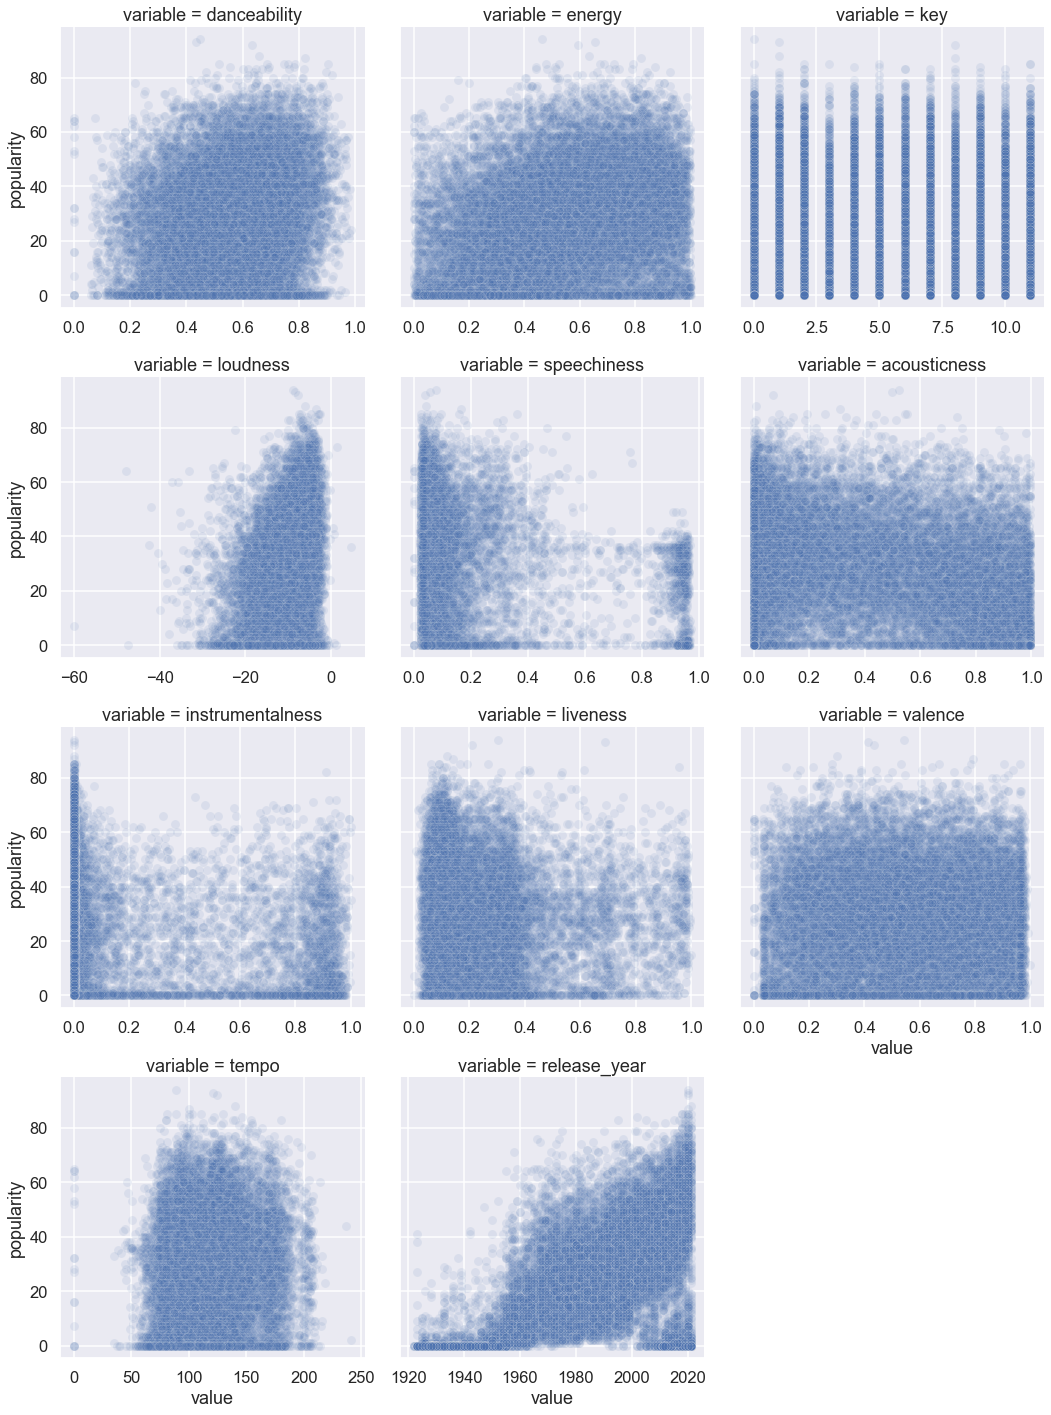

In [12]:
sns.relplot(y = 'popularity', x = 'value', col = 'variable', col_wrap = 3, alpha = .1, data = spotify_train_long,facet_kws={'sharey': True, 'sharex': False})
#sns.FacetGrid(data = spotify_train_long, col = 'variable')

# Part 3: Preliminary Results and Methods

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
# data = spotify_train[["duration_ms", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", 
# "instrumentalness", "liveness", "valence", "tempo", "release_year"]]
data = spotify_train[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", 
                      "liveness", "valence"]].values
target = spotify_train["popularity"].values

In [15]:
linear_model = LinearRegression()
linear_model.fit(X = data, y = target)
spotify_train["predicted"] = linear_model.predict(data)
linear_model.coef_

array([ 16.94151864,   1.95945074,   0.53299679,  -3.92735475,
       -12.49936487,  -9.0671275 ,  -2.81065651, -14.08269879])

In [16]:
mse = mean_squared_error(spotify_train["popularity"].values, spotify_train["predicted"].values)
r2 = r2_score(spotify_train["popularity"].values, spotify_train["predicted"].values)

print("MSE:", mse, "r^2:", r2)

MSE: 271.80233313724807 r^2: 0.20373388208669407


## Ridge (with cross validation)

In [17]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(cv = 5).fit(X = data, y = target)
spotify_train["predicted"] = ridge_model.predict(data)
ridge_model.coef_

array([ 16.88370323,   1.94385579,   0.53385234,  -3.90861679,
       -12.50066175,  -9.06002014,  -2.81375347, -14.05145373])

In [18]:
mse = mean_squared_error(spotify_train["popularity"].values, spotify_train["predicted"].values)
r2 = r2_score(spotify_train["popularity"].values, spotify_train["predicted"].values)

print("MSE:", mse, "r^2:", r2)

MSE: 271.8024073153839 r^2: 0.20373366477606414


## LASSO (with cross validation)

In [19]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(cv=5).fit(X = data, y = target)
spotify_train["predicted"] = lasso_model.predict(data)
lasso_model.coef_

array([ 14.4610014 ,   0.        ,   0.61273396,  -2.408875  ,
       -12.90635574,  -8.35258911,  -2.13936703, -12.52287223])

In [20]:
mse = mean_squared_error(spotify_train["popularity"].values, spotify_train["predicted"].values)
r2 = r2_score(spotify_train["popularity"].values, spotify_train["predicted"].values)

print("MSE:", mse, "r^2:", r2)

MSE: 272.03676340043995 r^2: 0.20304710036028795


## KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

knn_model = KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X = data, y = target)
spotify_train["predicted"] = knn_model.predict(data)

mse = mean_squared_error(spotify_train["popularity"].values, spotify_train["predicted"].values)
r2 = r2_score(spotify_train["popularity"].values, spotify_train["predicted"].values)

print("MSE:", mse, "r^2:", r2)

MSE: 193.7575580952381 r^2: 0.4323721330127389


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth = 60) #?
rf_model.fit(X = data, y = target)
spotify_train["predicted"] = rf_model.predict(data)

mse = mean_squared_error(spotify_train["popularity"].values, spotify_train["predicted"].values)
r2 = r2_score(spotify_train["popularity"].values, spotify_train["predicted"].values)

print("MSE:", mse, "r^2:", r2)

MSE: 34.00519977617454 r^2: 0.900379117051331


# Part 4: Reflection and Next Steps

1. What has been successful in the project so far or what is essentially complete and ready for the final report?

    Within our project we have explored our dataset in depth. In doing this we have plotted our data in various ways in order to get a clearer view of the information given for each song. We have also made models of song popularity with respect to the other characteristics given in the data set: danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence. Using the models we were able to look at the mean squared difference between our predictions and the real data (MSE) as well as the squared Pearson's correlation coefficient. As can be seen in part 3 the best matched model predictor we have is Random Forest. For random forest the $r^2$ score is the closest to 1, which indicates that the predictions are closely related to the real data. 

2. What has been challenging in the project so far or what is incomplete in the prototype that needs to be finished for the final report?

    A challenge that we have faced was trying to find a suitable model to use to predict our data. For the final prototype we still must decide on a final model and then analyze the predictions given based off of it. 

3. What are your next steps? These should be concrete and specific actions that your group will take to address the challenges identified in order to complete a successful final project.

    Next Steps:
        - 